/var/folders/04/g0d8sr254y9cr0nb_f4hwppc0000gn/T/ipykernel_44886/2711100570.py:29: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/04/g0d8sr254y9cr0nb_f4hwppc0000gn/T/ipykernel_44886/2711100570.py:29: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/04/g0d8sr254y9cr0nb_f4hwppc0000gn/T/ipykernel_44886/2711100570.py:29: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/04/g0d8sr254y9cr0nb_f4hwppc0000gn/T/ipykernel_44886/2711100570.py:29: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/04/g0d8sr254y9cr0nb_f4hwppc0000gn/T/ipykernel_44886/2711100570.py:29: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/04/g0d8sr254y9cr0nb_f4hwppc0000gn/T/ipyk

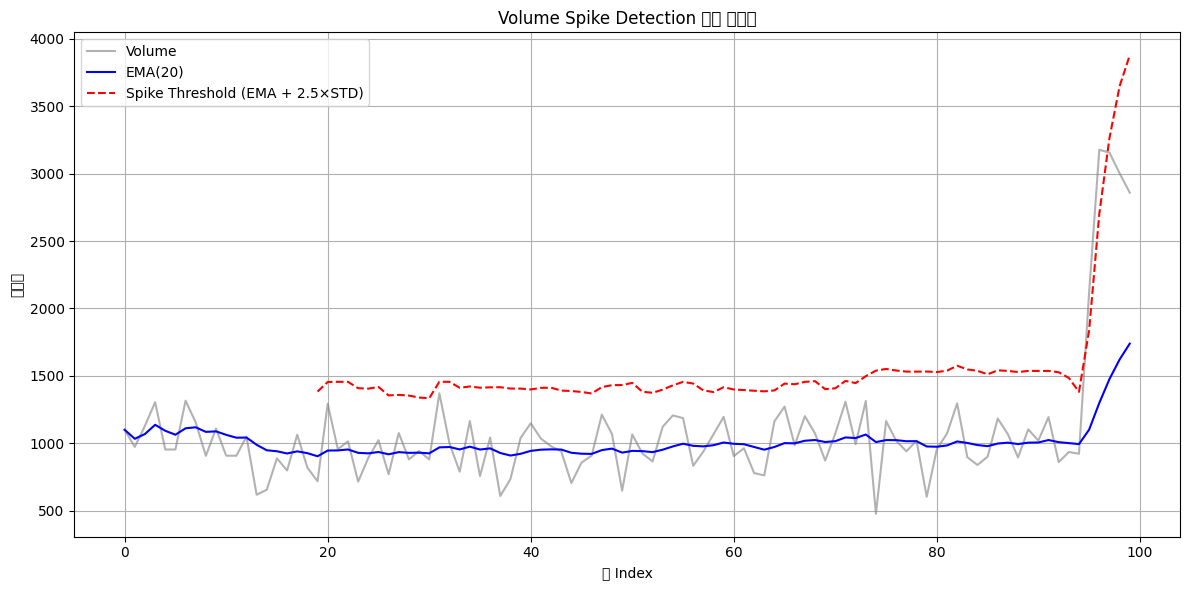

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 샘플 거래량 데이터
np.random.seed(42)
volume = np.random.normal(loc=1000, scale=200, size=100)
volume[95:] = volume[95:] * 3  # 인위적 스파이크 삽입

df = pd.DataFrame({'volume': volume})

# EMA + 표준편차 방식 스파이크 임계선 계산
ema_span = 20
std_multiplier = 2.5
df['volume_ema'] = df['volume'].ewm(span=ema_span).mean()
df['volume_std'] = df['volume'].rolling(ema_span).std()
df['threshold'] = df['volume_ema'] + df['volume_std'] * std_multiplier

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['volume'], label='Volume', color='gray', alpha=0.6)
plt.plot(df['volume_ema'], label=f'EMA({ema_span})', color='blue')
plt.plot(df['threshold'], label=f'Spike Threshold (EMA + {std_multiplier}×STD)', color='red', linestyle='--')
plt.title('Volume Spike Detection 기준 시각화')
plt.xlabel('봉 Index')
plt.ylabel('거래량')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()